# Prosper Loan Data Exploration

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#pm)
- [Exploratory Data Analysis](#eda)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Source Index](#sources)

<a id='intro'></a>
## Introduction

**Overview**
> This project focuses on using Python's data visualization tools to systemicaly explore a Prosper loan dataset for its properties and relationships between variables. A presentation was then created to communicate these findings to others.

**About Prosper**
>[Prosper](https://www.prosper.com/) is a San Francisco-based, peer-to-peer lender that provides personal loans to borrowers with fair or good credit. One of its subsidiaries, Prosper Funding LLC, operates on a website where individuals can either request to borrow money or invest in personal loans. To qualify applicants, Prosper rates borrowers using a risk-rating system that factors in hundreds of data points, including credit history. Investors use these ratings to decide whether to fund the requested loan. Each loan comes with a three to five year term. Since its founding in 2005, Prosper has originated more than $16 billion in loans and serviced over 980,000 people. 

**Dataset**
> This dataset contains data for over 100,000 prosper loans. Each row contains information about a specific loan that was funded through the Prosper marketplace. The DataSet can be found on the [Prosper webpage](https://www.prosper.com/tools/?referral=Spider5) and downloaded [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv). Prosper loan variable definitions can be found [on this page](https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html) for additional context.

<a id='pm'></a>
## Preliminary Wrangling

Since the main goal of this project is expoloratory data analysis, I merged assessing and cleaning steps into one section. This section primarily serves as a reference to better understand the original and cleaned datasets.

**Brief Overview of Changes**:
* Choose subset of important features
* Drop duplicate rows based on listing number
* Convert datatypes of TotalTrades and TotalInquiries to int, ListingCreationDatetime to datetime
* Remove rows without ProsperRating
* Fill in missing values of occupation and DebtToIncomeRatio
* Change listing category numeric to string

In [1]:
# Importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load csv into pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Display info from original dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Subsetting the df by selecting features of interest
cols = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
df_loan = loan[cols]

In [5]:
# Displaying info about the subdataset
# Should only see columns of interest from prev cell here
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  Occupation                 110349 non-null  object 
 11  Term                       113937 non-null  int64  
 12  EmploymentStatus           111682 non-null  object 
 13  TotalInquiries             11

In [6]:
# Displaying random rows to get a better understanding of dataset
df_loan.sample(10)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
100526,926162,2013-09-24 08:21:50.730000000,4000,Current,13,CA,0.25330,0.2155,6666.666667,D,Skilled Labor,36,Employed,4.0,0.08000,151.83,7.0,1
39124,1165594,2014-02-19 11:32:30.550000000,6000,Current,1,IN,0.24882,0.2235,3250.000000,D,Other,60,Employed,2.0,0.32000,166.91,17.0,1
105134,1219283,2014-03-01 09:41:12.093000000,20000,Current,1,TX,0.09065,0.0769,8166.666667,AA,Other,36,Employed,2.0,0.23000,623.87,22.0,126
82534,1247795,2014-03-08 15:09:42.310000000,15000,Current,1,MI,0.20321,0.1790,6250.000000,C,Nurse (RN),60,Employed,3.0,0.38000,380.09,27.0,1
24622,581972,2012-04-24 11:30:25.987000000,25000,Completed,3,VA,0.13084,0.1085,6250.000000,AA,Analyst,60,Employed,1.0,0.21000,541.69,14.0,537
96174,542165,2011-12-01 07:18:43.440000000,7500,Completed,3,PA,0.35090,0.3108,3206.666667,E,Other,36,Employed,9.0,0.30000,322.84,21.0,7
86360,577308,2012-04-10 13:52:24.710000000,5000,Completed,1,CO,0.11766,0.0899,2306.500000,A,Other,36,Employed,1.0,0.10000,158.98,8.0,72
80555,10998,2006-05-03 18:28:19.017000000,3001,Defaulted,0,GA,0.24502,0.2375,9825.000000,NaN,NaN,36,NaN,NaN,0.13774,117.34,NaN,29
77631,986571,2013-10-18 09:58:42.563000000,15000,Current,7,PA,0.17174,0.1485,4400.000000,B,Truck Driver,60,Employed,0.0,0.26000,355.67,22.0,188
88404,461043,2010-06-01 19:17:26.780000000,2500,Completed,1,PA,0.28574,0.2625,9291.666667,D,Other,36,Full-time,12.0,0.13000,101.06,24.0,75


In [7]:
# Dropping duplicates 
df_loan = df_loan.drop_duplicates()

In [8]:
# Making sure all duplicates are dropped, should be zero
sum(df_loan.duplicated())

0

In [9]:
# I'll be focusing on ProsperRatings as an important feature
# Selecting only rows where ProsperRating is not null (filling missing values isn't really possible here)
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [10]:
# Filling missing values for Occupation as unknown
df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

In [11]:
# Filling in missing values of DebtToIncomeRatio as mean of the column
df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

In [12]:
# Splitting ListingCreationDate column into year, month, day, and time
df_loan['year'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_loan['month'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [13]:
# Looking at month values
df_loan.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

In [14]:
# Replacing numerical values with month names
df_loan.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [15]:
# Checking, should see unique values as month name instead of values now
df_loan.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [16]:
# Changing ListingCreationDate to '-' and str format
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [17]:
# Changing ListingCreationDate to '-' and str format 
df_loan['day'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_loan['time'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [18]:
# Dropping original column ListingCreationDate 
df_loan.drop(columns = ['ListingCreationDate'], inplace = True)

In [19]:
# Checking
# Should see missing values filled
# Dtype changes and new columns for year, month, day, and time
# Column ListingCreationDate should be gone
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83982 non-null  int64  
 1   LoanOriginalAmount         83982 non-null  int64  
 2   LoanStatus                 83982 non-null  object 
 3   ListingCategory (numeric)  83982 non-null  int64  
 4   BorrowerState              83982 non-null  object 
 5   BorrowerAPR                83982 non-null  float64
 6   BorrowerRate               83982 non-null  float64
 7   StatedMonthlyIncome        83982 non-null  float64
 8   ProsperRating (Alpha)      83982 non-null  object 
 9   Occupation                 83982 non-null  object 
 10  Term                       83982 non-null  int64  
 11  EmploymentStatus           83982 non-null  object 
 12  TotalInquiries             83982 non-null  float64
 13  DebtToIncomeRatio          83982 non-null  fl

**Dataset structure**:
* This data set contains 113,937 loans with 81 variables for each loan. Some variables include borrow income, APR, term, and occupation.

**Main features of interest:**
* I'm interested in exploring variables that might have an effect on borrower API will be analyzed in this investigation. Features of interest that might help support this investigation include borrower's rating, occupation, and monthly income.

<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
# Displaying cleaned dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83982 non-null  int64  
 1   LoanOriginalAmount         83982 non-null  int64  
 2   LoanStatus                 83982 non-null  object 
 3   ListingCategory (numeric)  83982 non-null  int64  
 4   BorrowerState              83982 non-null  object 
 5   BorrowerAPR                83982 non-null  float64
 6   BorrowerRate               83982 non-null  float64
 7   StatedMonthlyIncome        83982 non-null  float64
 8   ProsperRating (Alpha)      83982 non-null  object 
 9   Occupation                 83982 non-null  object 
 10  Term                       83982 non-null  int64  
 11  EmploymentStatus           83982 non-null  object 
 12  TotalInquiries             83982 non-null  float64
 13  DebtToIncomeRatio          83982 non-null  fl

In [21]:
# Looking at descriptive statistics for numeric values
df_loan.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


**Dataset Structure:**
* This dataset contains information for 83,982 loans with 21 variables (LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmployerStatus etc.)

**Features of interest in dataset:**
* I'm interested in exploring features that can be used for predicting the borrower's Annual Percentage Rate (APR), employment status, and debt to income ratio.
    * I am predicting that the total loan amount will have an  effect on APR
    * I also think the borrowers' employment status and debt to income ratio will be associated with various metrics in the dataset

<a id='univariate'></a>
## Univariate Exploration

In [22]:
# Changing month into ordered categorical types
rate_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['month'] = df_loan['month'].astype(ordered_var)
df_loan.groupby('month')['ListingNumber'].count()

month
Jan     9036
Feb     7887
Mar     5376
Apr     4906
May     5469
Jun     5805
Jul     6630
Aug     6401
Sept    7480
Oct     8586
Nov     8122
Dec     8284
Name: ListingNumber, dtype: int64

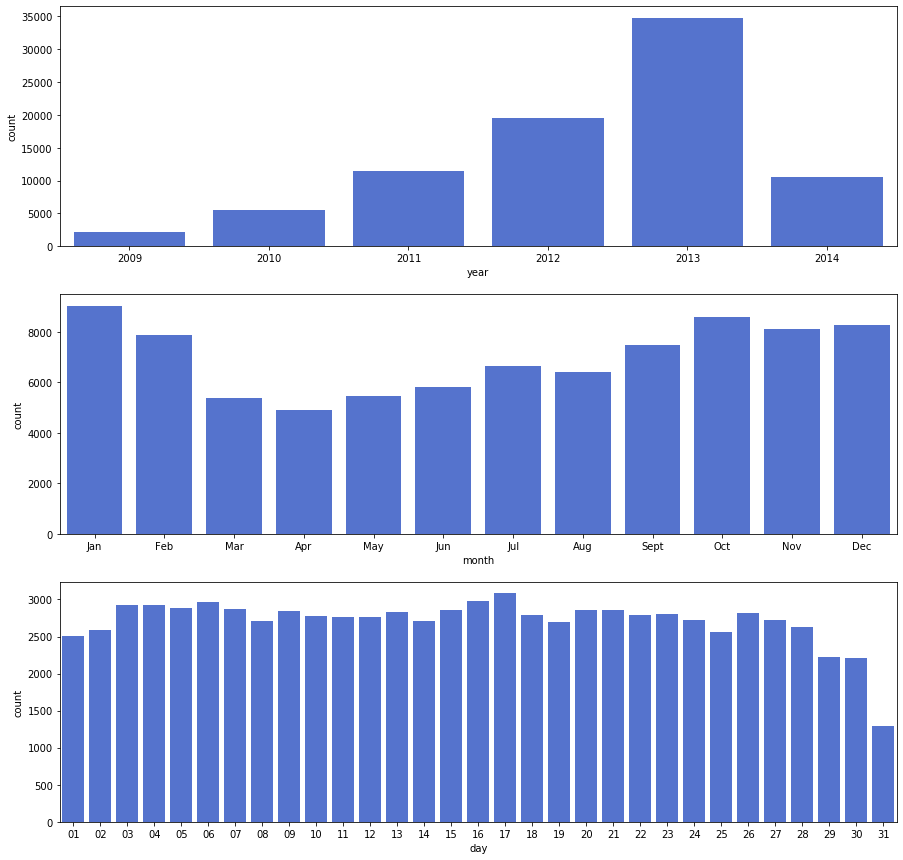

In [23]:
# Building countplots of loans 
# Displayed by year, month, and day
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'year', color = 'royalblue', ax = ax[0])
sb.countplot(data = df_loan, x = 'month', color = 'royalblue', ax = ax[1])
sb.countplot(data = df_loan, x = 'day', color = 'royalblue', ax = ax[2])

There is an upward trend with number of loans increasing each year. January has the highest amount of loans listed with April being the lowest and not much variation based on day of the month.

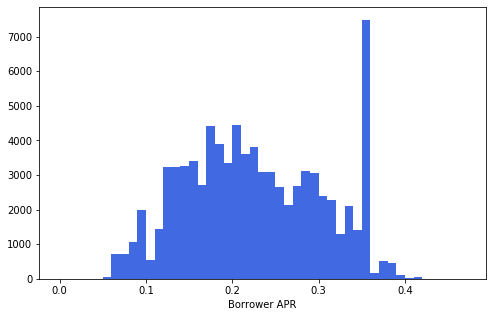

In [24]:
# Looking at distributio of borrow APR
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, color = 'royalblue', x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR');

The distribution of APR looks multimodal with a small peaks centered at 0.1 and 0.3 and a sharp peak between 0.35 and 0.36. There are very few loans with an APR greater than 0.4.

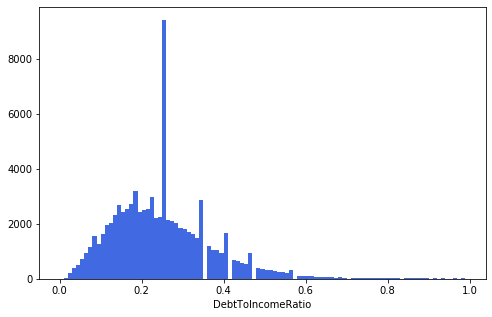

In [25]:
# Now I'm looking at the distribution of DebtToIncomeRatio
bins = np.arange(0, 1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, color = 'royalblue', x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio');

The distribution of debt to income ratio looks unimodal with a peaks around 0.2 and a spike at 0.25. This indicates most people prefer a 1:4 debt to income ratio. 

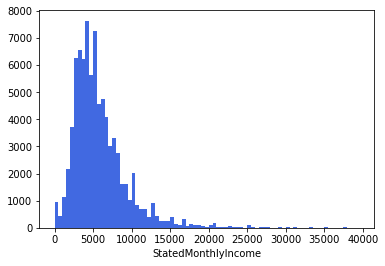

In [26]:
# Looking at distribution of StatedMonthlyIncome
bins_smi = np.arange(0, 40000, 500)
plt.hist(data = df_loan, color = 'royalblue', x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlabel('StatedMonthlyIncome');

The distribution of stated monthly income is right skewed with stated monthly incomes less than 33,000 and peaks around 6,000. There are some outliers around 10,000 and 5,000 that should be removed.

In [27]:
# Exploring borrows with monthly incomes less than 30k
df_loan = df_loan[df_loan.StatedMonthlyIncome<30000]

In [28]:
# Converting EmploymentStatus and ProsperRating to ordered categorical dtypes
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_var)

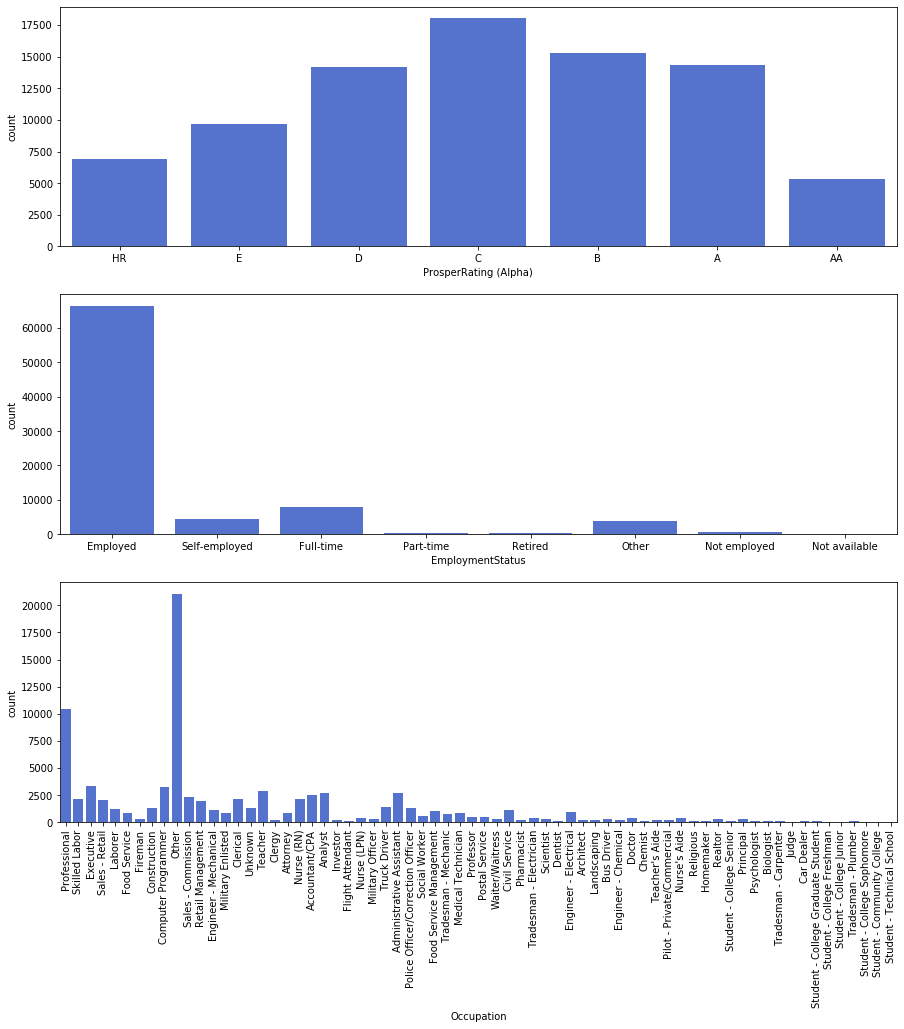

In [29]:
# Plotting ProsperRating (Alpha), EmploymentStatus, and Occupation for borrows with StatedMonthlyIncomes less than 30k
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'Occupation', color = 'royalblue', ax = ax[2]);
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = 'royalblue', ax = ax[1]);
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = 'royalblue', ax = ax[0]);
plt.xticks(rotation=90);

These plots look at prosper ratings, employment status, and occupation for borrowers. Most borrower ratings are btween D and B with majority having a C rating. Majority are employed professionals. Students make up the least common borrower occupation.  

**Observations**:
* The distribution of borrowers is multimodal with most points in the range of 0.1 and 0.3. Of the features investigated, the distribution of debt to income ratio and stated monthly income are right skewed. There aren't any unusual points that require a transformation.

<a id='bivariate'></a>
## Bivariate Exploration

For some direction in this analysis, I'm going to start by looking at correlations between variables.

In [30]:
# Separating categorical and numerical values
cat_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus','Occupation'] 
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio']

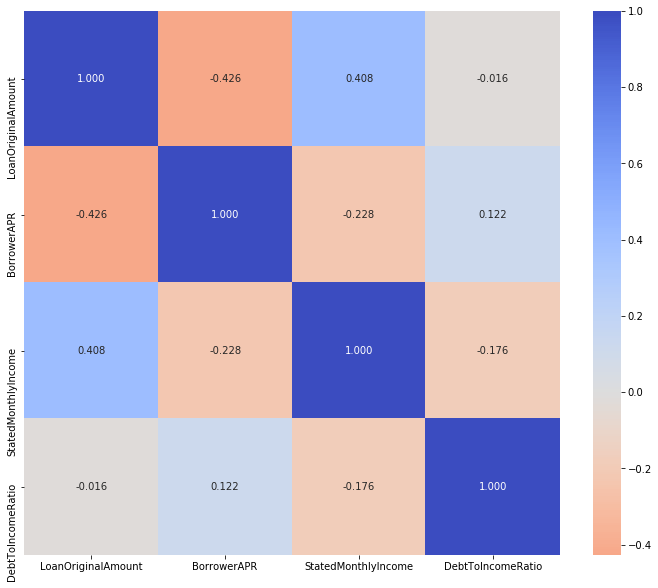

In [31]:
# Looking at correlation plot
plt.figure(figsize = [12, 10])
sb.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap='coolwarm_r', center = 0)

The heatmap shows a correlation coefficient of -0.426 between loan amount and borrower APR. 

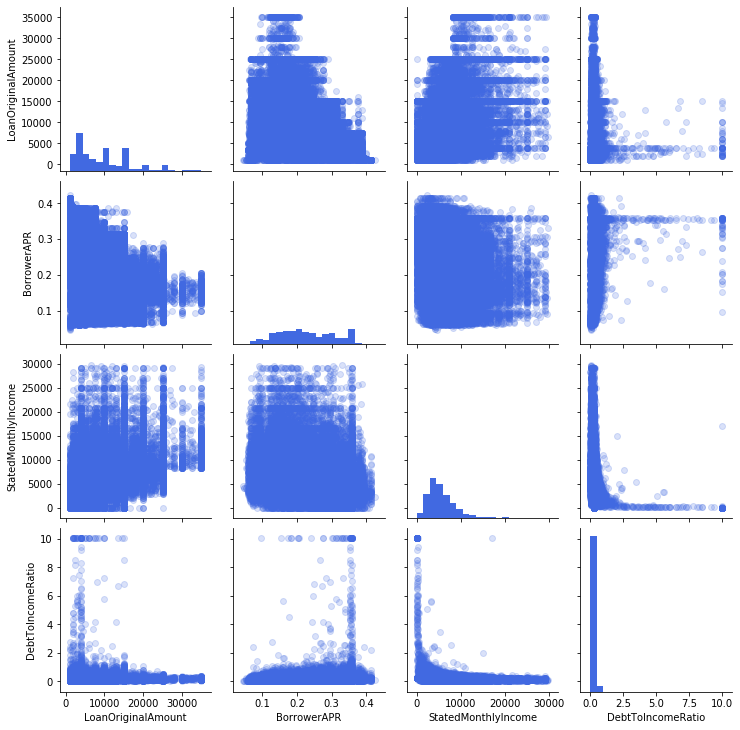

In [32]:
# Looking for more correlations with a PairGrid
g = sb.PairGrid(data = df_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20, color = 'royalblue')
g.map_offdiag(plt.scatter, alpha=0.2, color = 'royalblue');

Similar to the heat map, the scatter plot also shows a negative correlation between APR and loan original amount. This observation aligns with the previous hypothesis: the larger the APR, the smaller the original loan amount. The plots also shows a positive correlation with stated monthly income and loan original amount. This also makes sense since borrowers with greater monthly income tend to be approved for larger loans.

Now moving on to look at correlation between stated monthly income, loan original amount, and APR with categorical variables.

<Figure size 720x720 with 0 Axes>

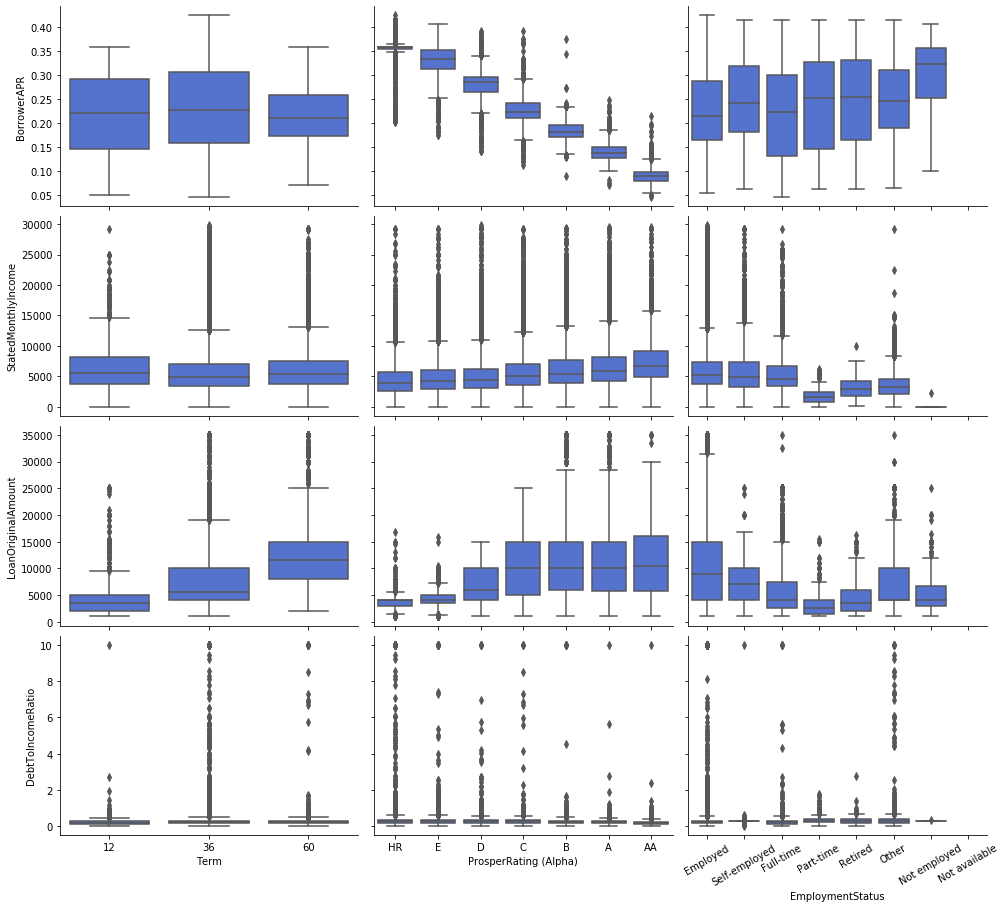

In [33]:
# Plotting box plot of numeric feature matrix against categorical features
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = 'royalblue')

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

Borrower's with the highest Prosper ratings have the lowest APR indicating a strong effect on borrower APR. The plot also shows a larger loan amount associated with an increase in loan term. Borrowers with higher ratings have larger monthly income and loan amounts. Employed, self-employed and full time borrowers have a larger monthly income and loan amount than those who are unemployed, work part time, and retired. 

Looking closer at the relationship between BorrowerAPR and ProsperRating (Alpha)

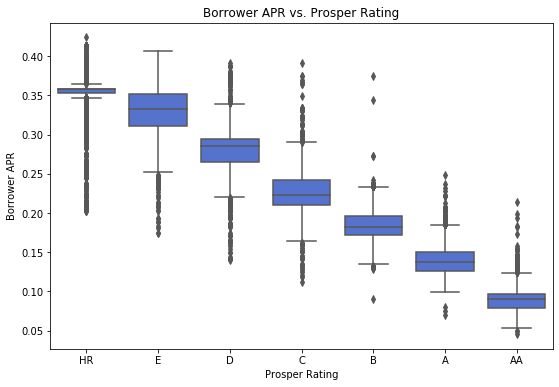

In [34]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=df_loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color='royalblue')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

Based on this figure, borrower APR decreases as prosper ratings increase. Borrowers with higher prosper ratings recieve lower APRs indicating that ratings influence borrower APR.

I'm interested in looking at the relationships between these four categories: prosper rating, term, employment status, and loan amount

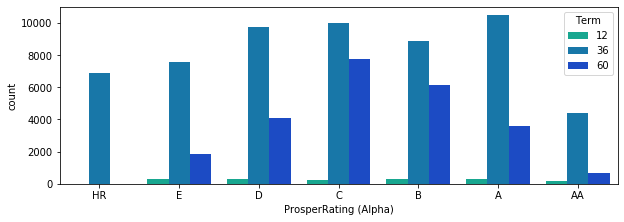

In [35]:
# Plotting ProsperRating vs. Term
plt.figure(figsize = [10,15])
plt.subplot(4, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'winter_r');

We see an increase in loan term as ratings increase from HR through C. The terms begin to decrease as ratings imporve from C through AA.

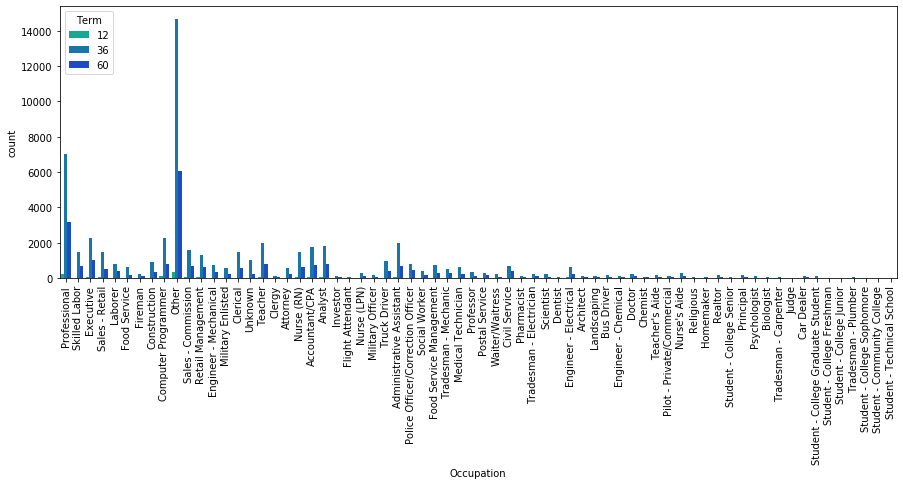

In [36]:
# Plotting Occupation vs. Term
plt.figure(figsize = [15,5])
sb.countplot(data = df_loan, x = 'Occupation', hue = 'Term', palette = 'winter_r');
plt.xticks(rotation=90);

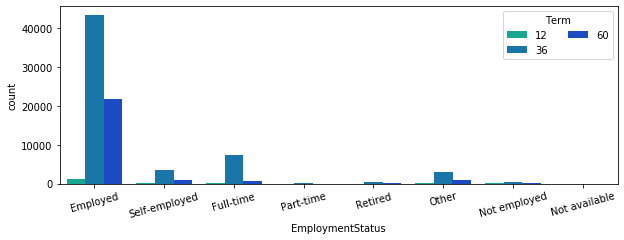

In [37]:
# Plotting EmploymentStatus vs. Term
plt.figure(figsize = [10, 15])
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_loan, x = 'EmploymentStatus', palette = 'winter_r', hue = "Term")
plt.xticks(rotation = 15) # Making these more legible 
ax.legend(loc = 1, ncol = 2).set_title('Term') # Moving legend 

There's not really a lot of data with EmploymentStatus, let's look at EmploymentStatus vs ProsperRating

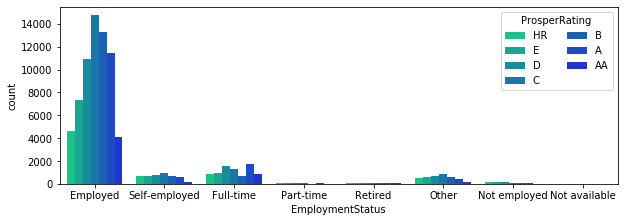

In [38]:
# Plotting ProsperRating vs. EmploymentStatus
plt.figure(figsize = [10, 15])
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'winter_r')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
ax.legend(loc = 1, ncol = 2).set_title('ProsperRating');

The EmploymentStatus for borrowers is employed, with much little to no data available for all other categories. Based on the lack of data, it's difficult to make any conclusions on correlation between employment status and ratings or terms. Same goes for the occupation, with most borrowers being professionals and 'other'. However, we do see an association between term and ratings. Ratings of B and C tend to have more 60-month loans and ratings of HR only have 36-month loans.

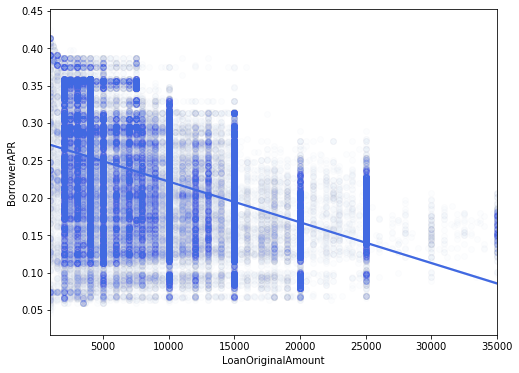

In [39]:
# Now looking at BorrowerAPR in relation to LoanOriginalAmount for all variables in the dataset
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, color = 'royalblue');

Based on this plot, borrower APR has a large range with original loan amounts. This range however, decreases as the loan original amount decreases indicating an overall negative corrlation between borrower APR and original loan amount.

**How features of interest varied with other features in the dataset:**
* Borrower APR has a pretty large range, but we see this range decrease as loan amounts increase. We also see a negative correlation between borrower APR and original loan amount. The higher the loan, the lower the APR. A higher Prosper rating results in a lower APR. 

**Observations in relationships between other features:**
* Monthly income is possitively associated with loan original amount. This means that borrowers with a higher monthly income can loan more money. Larger monthly incomes are also associated with higher Prosper ratings and greater loan original amount. 

<a id='multivariate'></a>
## Multivariate Exploration

In this section we'll be exploring the relationship between prosper rating and term with loan amount and APR.

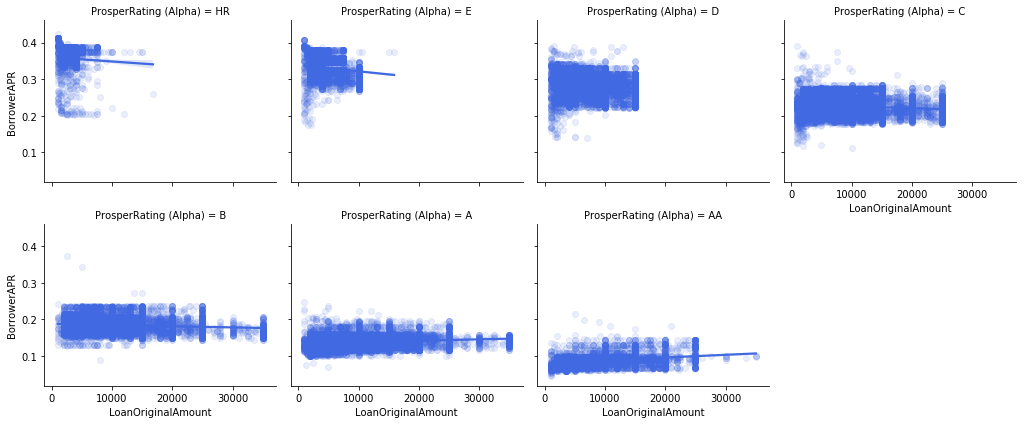

In [40]:
# Looking at the effects ProsperRating has on APR and LoanOriginalAmount
g=sb.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1}, color = 'royalblue')
g.add_legend();

Based on these plots, borrower APR decrease as ratings increase. High ratings also lead to an increase in original loan amount. In ratings above B, we start to see an increase in APR associated with larger loan amounts. One possible explanation for this observation would be that the borrowers with A and AA ratings tend to borrow larger amounts and an increased APR prevents them from even larger loans, while still maximizing profits. Conversely, APR decreases with increasing loan amounts for borrowers with lower ratings of C, D, E, and HR. Since people with lower ratings typically loan smaller amounts, the decrease in APR with larger loans encourges those with lower ratings to borrow more. 

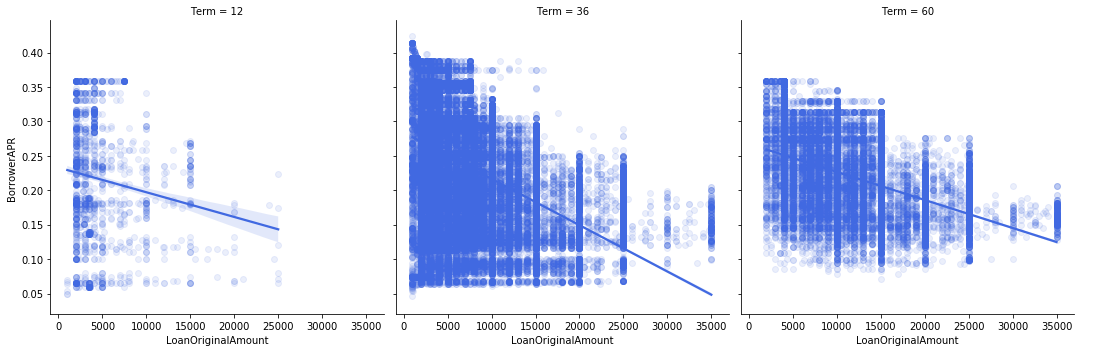

In [41]:
# Looking at the effect of Term on APR and LoanOriginalAmount
g=sb.FacetGrid(data= df_loan, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1}, color = 'royalblue');
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.add_legend();

Based on these plots, term does not seem to have an effect on APR and original loan amounts.

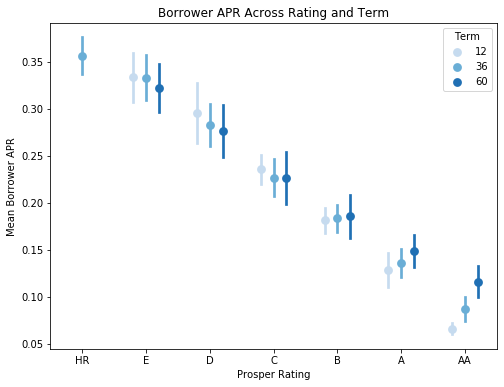

In [42]:
# Now looking at BorrowerAPR effects on ProsperRating and Term
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR Across Rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

It looks like borrower APR decreases as term increases for borrowers with ratings HR through C. For those with ratings greater than B, there is an increasing APR associated with longer terms. 

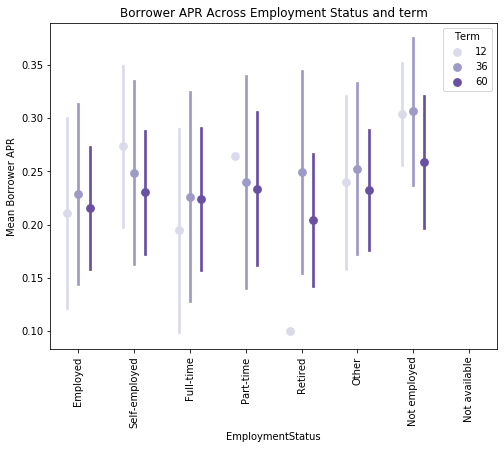

In [43]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR Across Employment Status and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

It's a little hard to distinguish any relationships here. When exploring the EmploymentStatus variable in the previous section (bivariate exploration), we determined that there wasn't enough data for employment status to come to any meaningful conclusions. Based on lack of data we can't really determine any relationships between these variables.

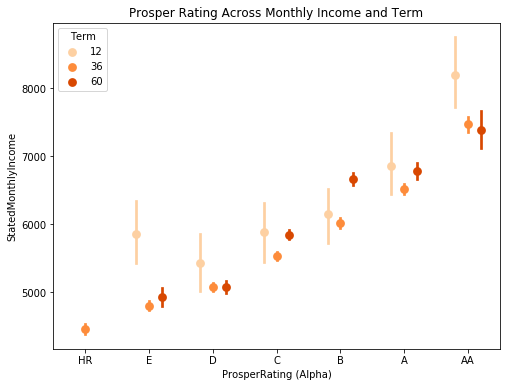

In [44]:
# Looking at Rating effects on StatedMonthlyIncome and ProsperRating
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Oranges', linestyles = '', dodge = 0.4)
plt.title('Prosper Rating Across Monthly Income and Term')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('StatedMonthlyIncome');

For stated monthly income, there doesn't seem to be an interaction between term and rating. The pattern is similar among different ratings. 

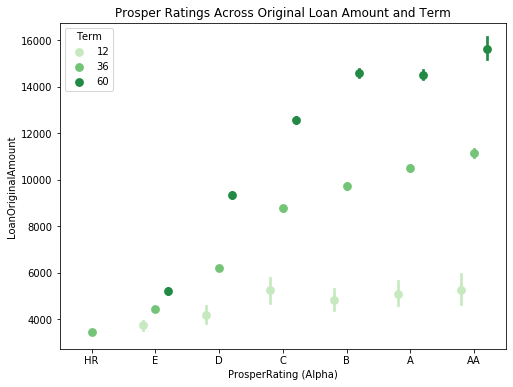

In [45]:
# Looking at Rating effects on LoanOriginalAmount and ProspectRating
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Prosper Ratings Across Original Loan Amount and Term')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('LoanOriginalAmount');

Here we do see a relationship between term and rating based on loan amount. With increasing ratings, we see an increase in all three terms. We also see that the amplitude for original loan amounts between terms increases with higher ratings. 

In [46]:
# Saving cleaned dataset for explanatory analysis
df_loan.to_csv('loan_cleaned.csv')

**Features that strengthened each other in terms of looking at features of interest:**
* The focus of this investigation shifted to borrower APR and its relation to original loan amount and prosper rating. In the multivariate exploration, analyses revealed a relationship negative relationship between borrower APR and ratings for lower ratings, while turning positive as ratings increased. The analysis also revealed a positive relationship between rating and original loan amount, and term. Higher Prosper ratings resulted in larger original loan amounts and an increase in the amplitude of terms. 

**Interesting interactions between features:**
* It was interesting to see the relationship between borrower APR, original loan amount, and borrow term. Borrow APR decreased with an increase in borrow term for people with lower Prosper ratings (HR-C), but increased for borrowers with higher ratings (B-AA). Another surprising observation showed the relationship between loan original amounts and borrower APR turning from negative to slightly positive with higher ratings. One possible explanation for this observation would be that the borrowers with A and AA ratings tend to borrow larger amounts and an increased APR prevents them from even larger loans, while still maximizing profits. Conversely, APR decreases with increasing loan amounts for borrowers with lower ratings of C, D, E, and HR. Since people with lower ratings typically loan smaller amounts, the decrease in APR with larger loans encourges those with lower ratings to borrow more.

<a id='sources'></a>
## Source Index

* https://matplotlib.org/3.1.0/gallery/color/named_colors.html
* https://matplotlib.org/tutorials/intermediate/legend_guide.html
* https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
* https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html
* https://www.prosper.com/tools/?referral=Spider5
* https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
* https://stackoverflow.com/questions/51579215/remove-seaborn-lineplot-legend-title
* https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
* https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
* https://www.udacity.com/course/data-analyst-nanodegree--nd002